In [1]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/Python/Data')

In [2]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [3]:
# Importing relevant libraries
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Reading the dataset
df_census = pd.read_csv('/Users/ssg/Desktop/income_census_data.csv')

In [5]:
df_census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
df_census.shape

(13968, 15)

In [7]:
df_census['Earning'].value_counts()/len(df_census)

<=50K    0.761025
>50K     0.238903
Name: Earning, dtype: float64

In [8]:
# Remove data with any missing information for now
df_census = df_census.dropna()

In [9]:
df_census.shape

(13967, 15)

In [10]:
df_census.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
Earning            object
dtype: object

# Data Exploration

In [11]:
# Get information about the features
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13967 entries, 0 to 13966
Data columns (total 15 columns):
age               13967 non-null int64
workclass         13967 non-null object
fnlwgt            13967 non-null int64
education         13967 non-null object
education_num     13967 non-null int64
marital_status    13967 non-null object
occupation        13967 non-null object
relationship      13967 non-null object
race              13967 non-null object
sex               13967 non-null object
capital_gain      13967 non-null float64
capital_loss      13967 non-null float64
hours_per_week    13967 non-null float64
native_country    13967 non-null object
Earning           13967 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 1.7+ MB


In [12]:
# Get summary stats for the categorical features
df_census.describe(include = ['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,Earning
count,13967,13967,13967,13967,13967,13967,13967,13967,13967
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,9720,4545,6429,1772,5656,11979,9357,12494,10630


In [13]:
df_census.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,13967.000000,1.396700e+04,13967.000000,13967.000000,13967.000000,13967.000000
mean,38.528245,1.898972e+05,10.084342,1049.468676,88.561610,40.493019
std,13.628756,1.048806e+05,2.550123,7266.240002,403.565761,12.293190
min,17.000000,1.921400e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182355e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784870e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.377320e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
# Create the feature/flag for Dep variable - Attrition status
df_census.Earning = df_census.Earning.apply(lambda x: 1 if x =='>50K' else 0)

In [15]:
df_census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [16]:
# Event Rate
# Get an idea about the event rate
df_census['Earning'].value_counts()/len(df_census)

0    0.76108
1    0.23892
Name: Earning, dtype: float64

In [17]:
df_census.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Earning
count,13967.000000,1.396700e+04,13967.000000,13967.000000,13967.000000,13967.000000,13967.000000
mean,38.528245,1.898972e+05,10.084342,1049.468676,88.561610,40.493019,0.238920
std,13.628756,1.048806e+05,2.550123,7266.240002,403.565761,12.293190,0.426439
min,17.000000,1.921400e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.182355e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784870e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.377320e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [18]:
df_census.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
Earning             int64
dtype: object

In [19]:
# Explore different features for any kind of inconsistent values
print('age:',sorted(df_census.age.unique()))
print('workclass:',df_census.workclass.unique())
print('education:',df_census.education.unique())
print('marital_status:',df_census.marital_status.unique())
print('occupation:',df_census.occupation.unique())
print('relationship:',df_census.relationship.unique())
print('race:',df_census.race.unique())
print('sex:',df_census.sex.unique())
print('capital_gain:',df_census.capital_gain.unique())
print('capital_loss:',df_census.capital_loss.unique())
print('hours_per_week:',df_census.hours_per_week.unique())
print('native_country:',df_census.native_country.unique())

age: [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 90]
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relatio

In [20]:
# Convert the categorical features
# Creating dummies for all these variables
d_workclass = pd.get_dummies(df_census['workclass'], prefix='wc')
d_education = pd.get_dummies(df_census['education'], prefix='edu')
d_maritalsta = pd.get_dummies(df_census['marital_status'], prefix='eduf')
d_occupation = pd.get_dummies(df_census['occupation'], prefix='ocu')
d_relationship = pd.get_dummies(df_census['relationship'], prefix='rel')
d_race = pd.get_dummies(df_census['race'], prefix='race') 
d_sex = pd.get_dummies(df_census['sex'], prefix='sex')

In [21]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['age','capital_gain','capital_loss','hours_per_week','fnlwgt']
df_census_cont = df_census[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_census_new = pd.concat([d_workclass,d_education,d_maritalsta,d_occupation,
                       d_relationship,d_race,d_sex,
                       df_census_cont,df_census['Earning']],axis=1)

In [22]:
df_census_new.shape

(13967, 66)

In [23]:
df_census_new.head()

,wc_Federal-gov,wc_Local-gov,wc_Never-worked,wc_Private,wc_Self-emp-inc,wc_Self-emp-not-inc,wc_State-gov,wc_Unknown,wc_Without-pay,edu_10th,...,race_Other,race_White,sex_Female,sex_Male,age,capital_gain,capital_loss,hours_per_week,fnlwgt,Earning
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,39,2174.0,0.0,40.0,77516,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,50,0.0,0.0,13.0,83311,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,38,0.0,0.0,40.0,215646,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,53,0.0,0.0,40.0,234721,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,28,0.0,0.0,40.0,338409,0


In [24]:
df_census_new.dtypes

wc_Federal-gov                  uint8
wc_Local-gov                    uint8
wc_Never-worked                 uint8
wc_Private                      uint8
wc_Self-emp-inc                 uint8
wc_Self-emp-not-inc             uint8
wc_State-gov                    uint8
wc_Unknown                      uint8
wc_Without-pay                  uint8
edu_10th                        uint8
edu_11th                        uint8
edu_12th                        uint8
edu_1st-4th                     uint8
edu_5th-6th                     uint8
edu_7th-8th                     uint8
edu_9th                         uint8
edu_Assoc-acdm                  uint8
edu_Assoc-voc                   uint8
edu_Bachelors                   uint8
edu_Doctorate                   uint8
edu_HS-grad                     uint8
edu_Masters                     uint8
edu_Preschool                   uint8
edu_Prof-school                 uint8
edu_Some-college                uint8
eduf_Divorced                   uint8
eduf_Married

# Exploratory Data Analysis

(0, 3000)

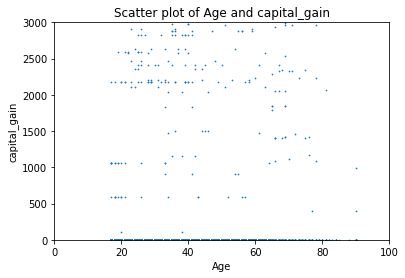

In [25]:
# Scatter Plot Between Age and capital_gain
plt.scatter(df_census_new['age'], df_census_new['capital_gain'], s=0.5)
plt.title('Scatter plot of Age and capital_gain')
plt.xlabel('Age')
plt.ylabel('capital_gain')
plt.xlim(0, 100)
plt.ylim(0, 3000)

In [26]:
# Calculating Pearson Correlation Between Age and capital gain
pd.set_option('display.width', 200)
pd.set_option('precision', 2)
correlations = df_census_new[['age', 'capital_gain']].corr(method='pearson')
print(correlations)

               age  capital_gain
age           1.00          0.06
capital_gain  0.06          1.00


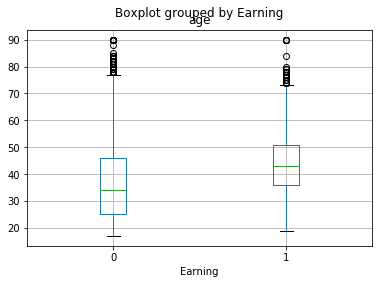

In [27]:
# Plotting Box Plot of Age by Status
df_census_new.boxplot(column=['age'], return_type='axes', by='Earning')
plt.show()

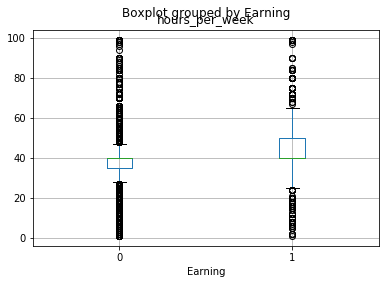

In [28]:
# Plotting Box Plot of DistanceFromHome by Attrition
df_census_new.boxplot(column=['hours_per_week'], return_type='axes', by='Earning')
plt.show()

In [29]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
err_yes_50K = round(df_census_new[df_census_new['Earning'] == 1][subset_attributes].describe(),2)
err_no_50K = round(df_census_new[df_census_new['Earning'] == 0][subset_attributes].describe(),2)
pd.concat([err_yes_50K, err_no_50K], axis=1, keys=['Earning_>50K ', 'Earning_<=50K'])

Earning_>50K                                           Earning_<=50K                                         
                age capital_gain capital_loss hours_per_week           age capital_gain capital_loss hours_per_week
count       3337.00      3337.00      3337.00        3337.00      10630.00     10630.00     10630.00       10630.00
mean          44.03      3891.84       202.67          45.33         36.80       157.18        52.74          38.97
std           10.39     14384.54       603.56          10.97         14.06      1048.66       307.07          12.29
min           19.00         0.00         0.00           1.00         17.00         0.00         0.00           1.00
25%           36.00         0.00         0.00          40.00         25.00         0.00         0.00          35.00
50%           43.00         0.00         0.00          40.00         34.00         0.00         0.00          40.00
75%           51.00         0.00         0.00          50.00         46.00         0.00         0.00          40.00
max           90.00     99999.00      3683.00          99.00         90.00     41310.00      4356.00          99.00

In [30]:
# Inferential Stats
from scipy import stats
F, p = stats.f_oneway(df_census_new[df_census_new['Earning'] == 1]['capital_gain'], 
                      df_census_new[df_census_new['Earning'] == 0]['capital_gain'])
print('ANOVA test for mean capital_gain levels across Earning status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean capital_gain levels across Earning status
F Statistic: 704.7228666488817  p-value: 1.568125225867388e-151


/Users/ssg/Desktop/Python/packge/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Text(0, 0.5, 'age')

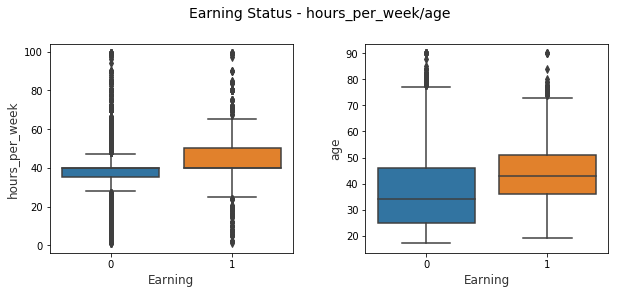

In [31]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Earning Status - hours_per_week/age', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="Earning", y="hours_per_week",
            data=df_census_new, ax=ax1)
ax1.set_xlabel("Earning",size = 12,alpha=0.8)
ax1.set_ylabel("hours_per_week",size = 12,alpha=0.8)

sns.boxplot(x="Earning", y="age", data=df_census_new, ax=ax2)
ax2.set_xlabel("Earning",size = 12,alpha=0.8)
ax2.set_ylabel("age",size = 12,alpha=0.8)

/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


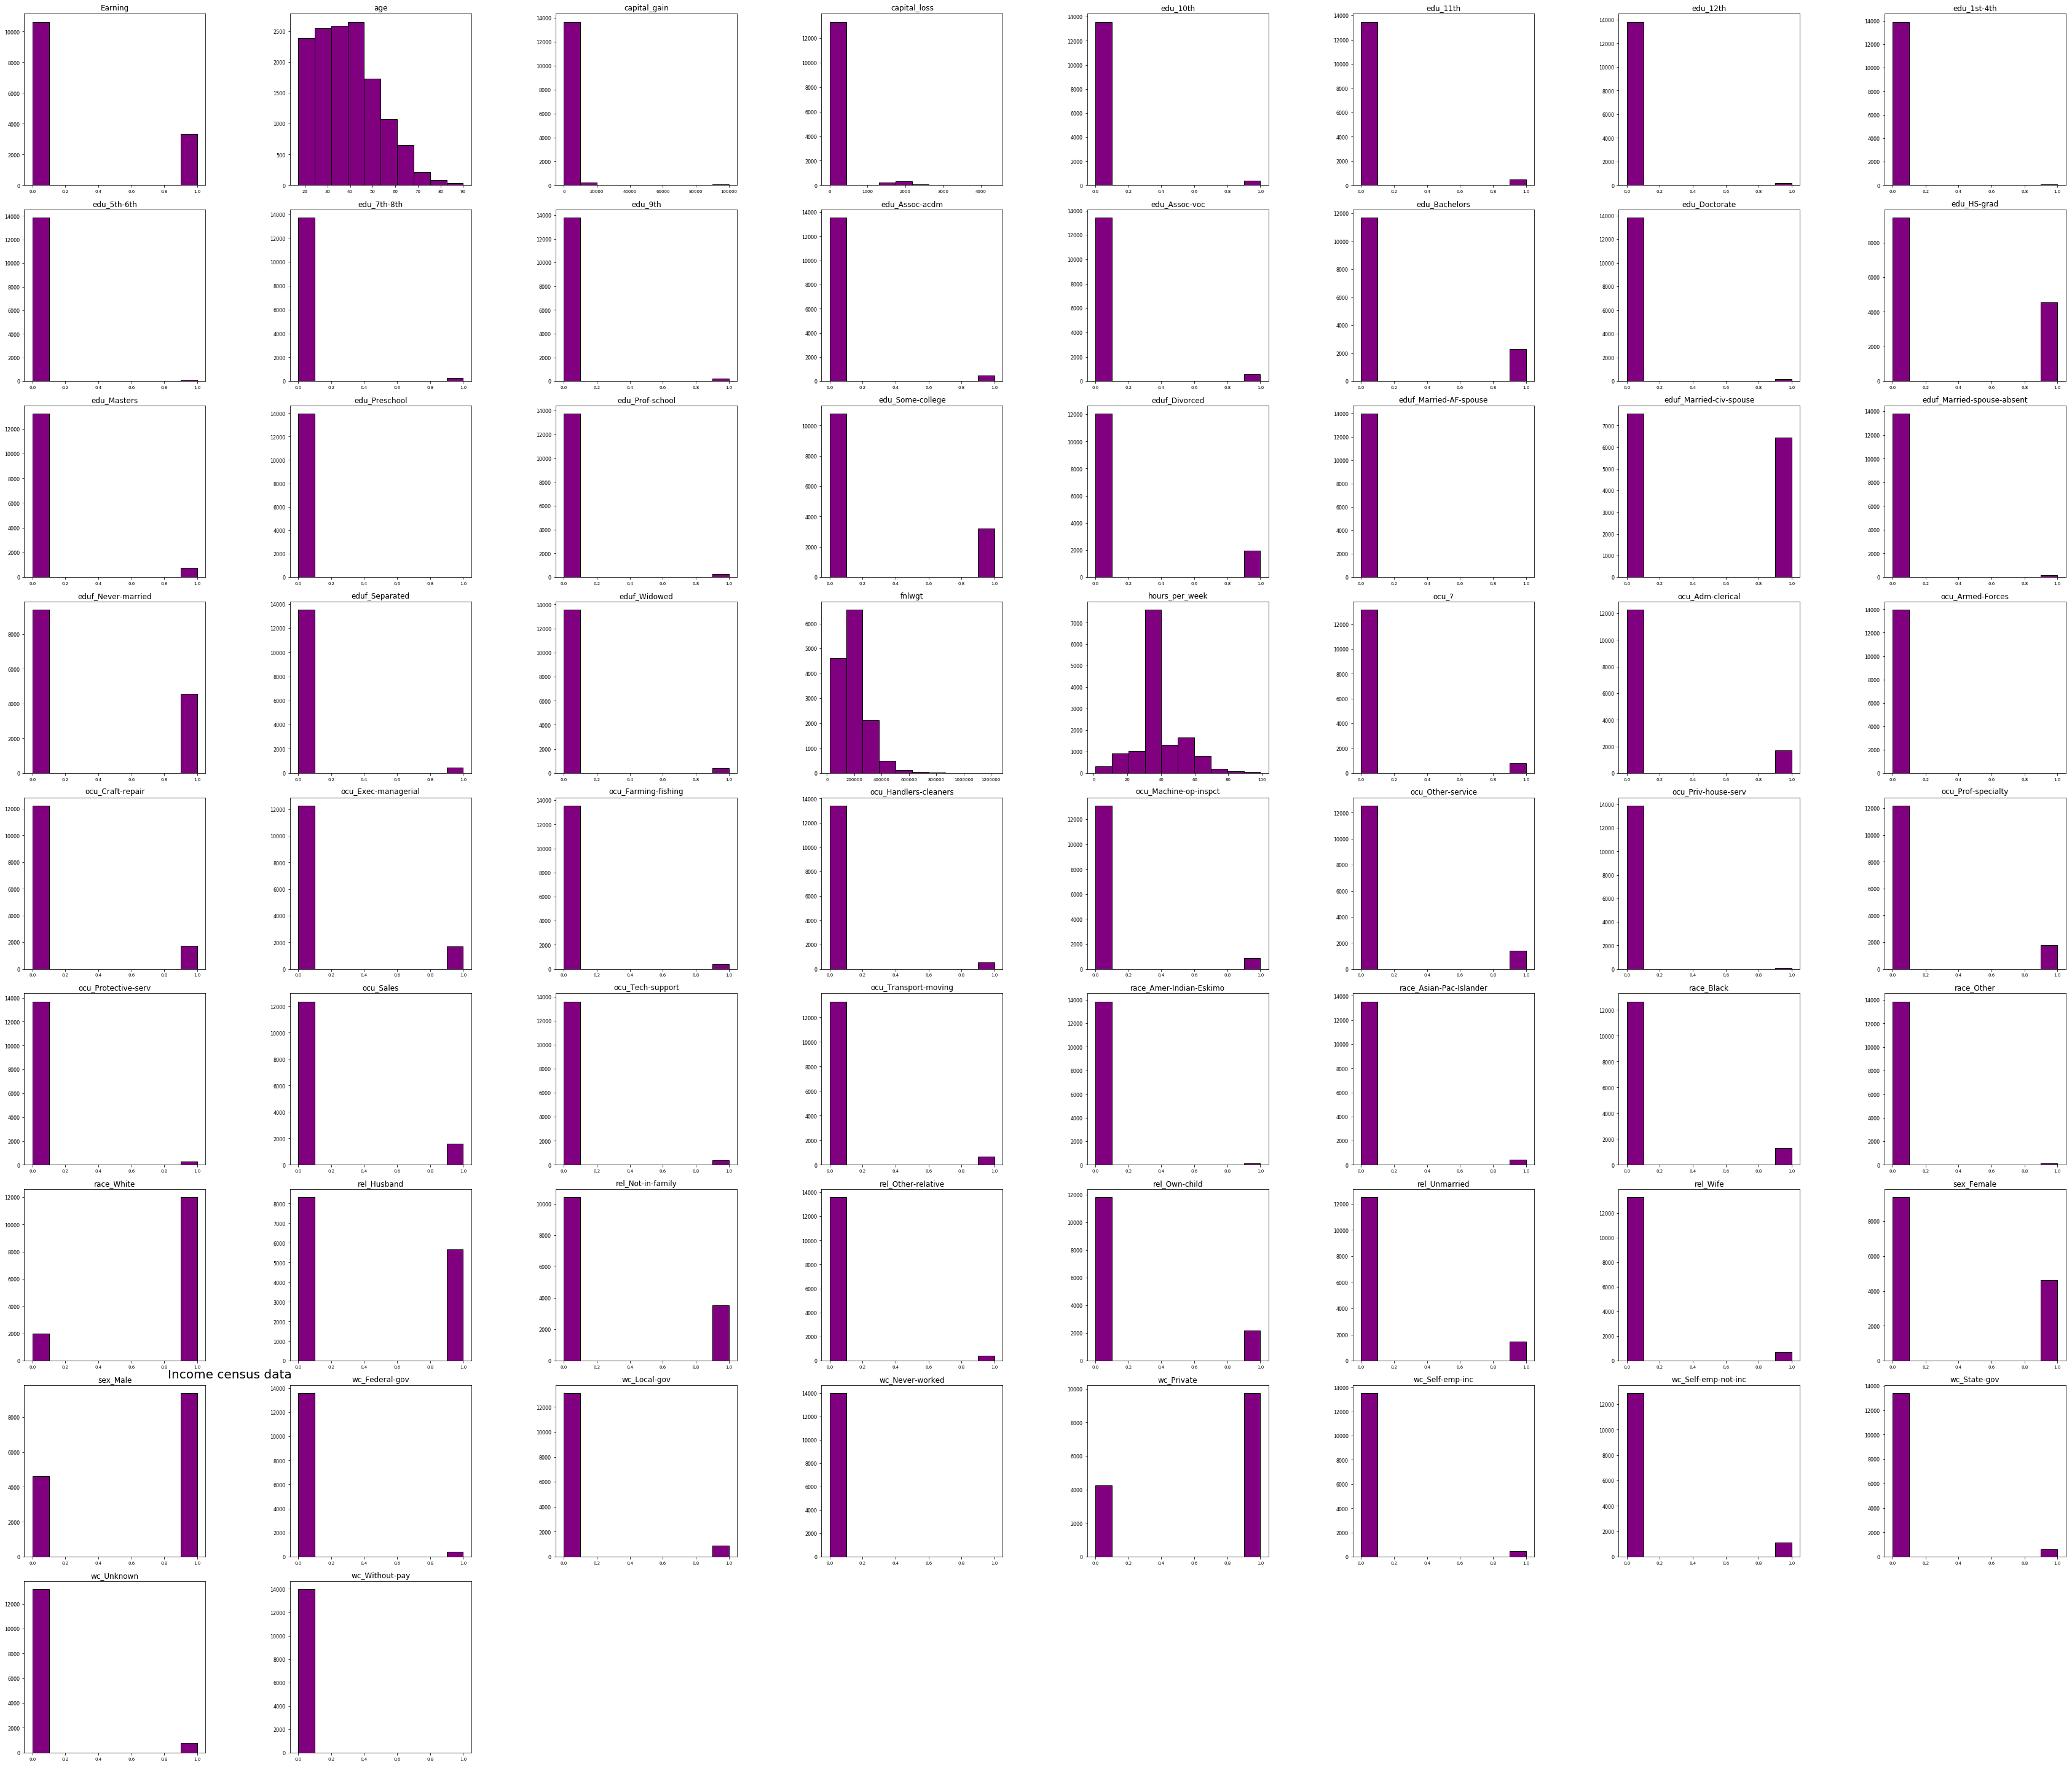

In [32]:
# Univariate analysis
df_census_new.hist(bins=10, color='purple', edgecolor='black', linewidth=1.0,
              xlabelsize=7, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 8, 10))   
rt = plt.suptitle('Income census data', x=0.9, y=2.25, fontsize=20)

In [33]:
# Finding the Correlation values for all the features
(round(df_census_new.corr(),2))

,wc_Federal-gov,wc_Local-gov,wc_Never-worked,wc_Private,wc_Self-emp-inc,wc_Self-emp-not-inc,wc_State-gov,wc_Unknown,wc_Without-pay,edu_10th,...,race_Other,race_White,sex_Female,sex_Male,age,capital_gain,capital_loss,hours_per_week,fnlwgt,Earning
wc_Federal-gov,1.00,-0.04,-0.00,-0.26,-0.03,-0.05,-0.04,-0.04,-0.00,-0.03,...,-0.00,-0.06,-0.01,0.01,0.04,-0.01,0.01,0.02,-0.01,0.06
wc_Local-gov,-0.04,1.00,-0.00,-0.39,-0.05,-0.08,-0.05,-0.06,-0.00,-0.02,...,-0.01,-0.02,0.04,-0.04,0.06,-0.01,0.02,0.01,-0.00,0.03
wc_Never-worked,-0.00,-0.00,1.00,-0.02,-0.00,-0.00,-0.00,-0.00,-0.00,0.03,...,-0.00,0.00,-0.01,0.01,-0.02,-0.00,-0.00,-0.00,0.00,-0.01
wc_Private,-0.26,-0.39,-0.02,1.00,-0.28,-0.44,-0.32,-0.37,-0.02,0.02,...,0.02,-0.01,0.05,-0.05,-0.19,-0.03,-0.03,-0.02,0.03,-0.08
wc_Self-emp-inc,-0.03,-0.05,-0.00,-0.28,1.00,-0.06,-0.04,-0.05,-0.00,-0.01,...,-0.00,0.04,-0.08,0.08,0.10,0.10,0.03,0.13,-0.03,0.13
wc_Self-emp-not-inc,-0.05,-0.08,-0.00,-0.44,-0.06,1.00,-0.06,-0.07,-0.00,0.01,...,-0.01,0.05,-0.11,0.11,0.13,0.02,0.02,0.09,-0.03,0.03
wc_State-gov,-0.04,-0.05,-0.00,-0.32,-0.04,-0.06,1.00,-0.05,-0.00,-0.02,...,-0.01,-0.01,0.02,-0.02,0.02,-0.01,0.00,-0.03,-0.02,0.02
wc_Unknown,-0.04,-0.06,-0.00,-0.37,-0.05,-0.07,-0.05,1.00,-0.00,0.03,...,0.01,-0.01,0.05,-0.05,0.04,-0.02,-0.02,-0.18,0.00,-0.08
wc_Without-pay,-0.00,-0.00,-0.00,-0.02,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.01
edu_10th,-0.03,-0.02,0.03,0.02,-0.01,0.01,-0.02,0.03,-0.00,1.00,...,0.00,-0.02,-0.00,0.00,-0.01,-0.02,-0.02,-0.03,0.02,-0.07


/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


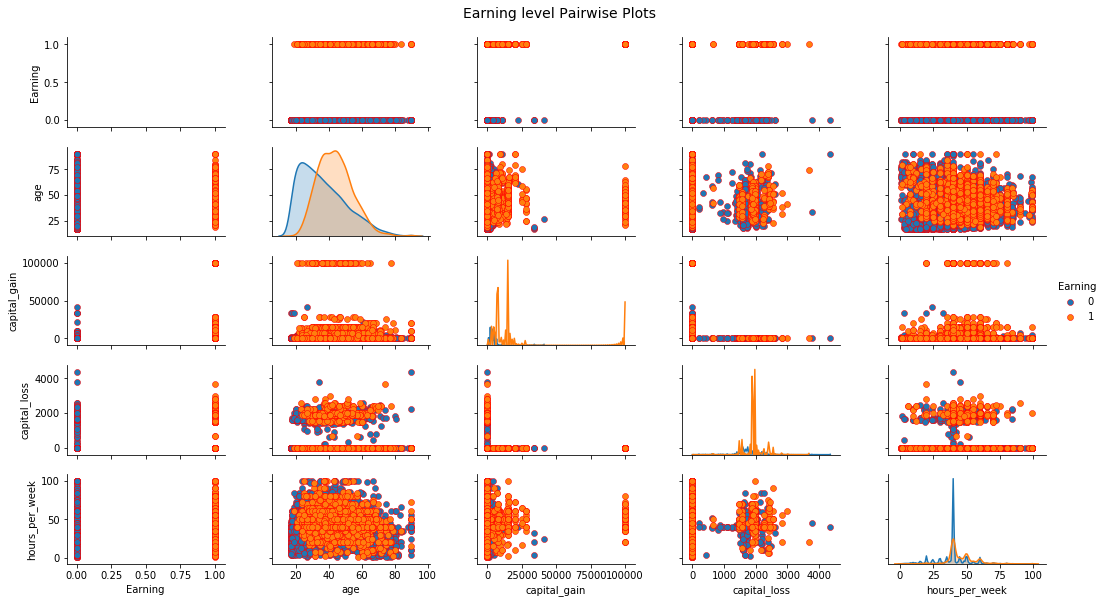

In [34]:
import seaborn as sns
cols = ['Earning','age', 'capital_gain', 'capital_loss','hours_per_week']
pp = sns.pairplot(df_census_new[cols], hue='Earning', height=1.7, aspect=1.7, 
                  plot_kws=dict(edgecolor="red", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Earning level Pairwise Plots', fontsize=14)

# Building the KNN Classification Model for the Income Census Data

In [35]:
Y_census_data = df_census_new['Earning']
X_census_data = df_census_new.drop(['Earning'],axis=1)

In [36]:
print(Y_census_data.shape)
print(X_census_data.shape)

(13967,)
(13967, 65)


In [37]:
# Creating the Feature Space for Iris data
X_colnames_u = [cols for cols in df_census_new.columns.tolist() if cols not in [
'Earning'
]]
X_colnames_u

['wc_Federal-gov',
 'wc_Local-gov',
 'wc_Never-worked',
 'wc_Private',
 'wc_Self-emp-inc',
 'wc_Self-emp-not-inc',
 'wc_State-gov',
 'wc_Unknown',
 'wc_Without-pay',
 'edu_10th',
 'edu_11th',
 'edu_12th',
 'edu_1st-4th',
 'edu_5th-6th',
 'edu_7th-8th',
 'edu_9th',
 'edu_Assoc-acdm',
 'edu_Assoc-voc',
 'edu_Bachelors',
 'edu_Doctorate',
 'edu_HS-grad',
 'edu_Masters',
 'edu_Preschool',
 'edu_Prof-school',
 'edu_Some-college',
 'eduf_Divorced',
 'eduf_Married-AF-spouse',
 'eduf_Married-civ-spouse',
 'eduf_Married-spouse-absent',
 'eduf_Never-married',
 'eduf_Separated',
 'eduf_Widowed',
 'ocu_?',
 'ocu_Adm-clerical',
 'ocu_Armed-Forces',
 'ocu_Craft-repair',
 'ocu_Exec-managerial',
 'ocu_Farming-fishing',
 'ocu_Handlers-cleaners',
 'ocu_Machine-op-inspct',
 'ocu_Other-service',
 'ocu_Priv-house-serv',
 'ocu_Prof-specialty',
 'ocu_Protective-serv',
 'ocu_Sales',
 'ocu_Tech-support',
 'ocu_Transport-moving',
 'rel_Husband',
 'rel_Not-in-family',
 'rel_Other-relative',
 'rel_Own-child',
 'r

In [38]:
# Scaling of Data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler(copy=False, with_mean=True, with_std=True)
X = pd.DataFrame(SC.fit_transform(X_census_data), columns = X_colnames_u)

/Users/ssg/Desktop/Python/packge/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ssg/Desktop/Python/packge/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
X.head()

,wc_Federal-gov,wc_Local-gov,wc_Never-worked,wc_Private,wc_Self-emp-inc,wc_Self-emp-not-inc,wc_State-gov,wc_Unknown,wc_Without-pay,edu_10th,...,race_Black,race_Other,race_White,sex_Female,sex_Male,age,capital_gain,capital_loss,hours_per_week,fnlwgt
0,-0.17,-0.26,-0.01,-1.51,-0.19,-0.29,4.80,-0.25,-0.01,-0.17,...,-0.32,-0.09,0.41,-0.70,0.70,0.03,0.15,-0.22,-0.04,-1.07
1,-0.17,-0.26,-0.01,-1.51,-0.19,3.41,-0.21,-0.25,-0.01,-0.17,...,-0.32,-0.09,0.41,-0.70,0.70,0.84,-0.14,-0.22,-2.24,-1.02
2,-0.17,-0.26,-0.01,0.66,-0.19,-0.29,-0.21,-0.25,-0.01,-0.17,...,-0.32,-0.09,0.41,-0.70,0.70,-0.04,-0.14,-0.22,-0.04,0.25
3,-0.17,-0.26,-0.01,0.66,-0.19,-0.29,-0.21,-0.25,-0.01,-0.17,...,3.10,-0.09,-2.45,-0.70,0.70,1.06,-0.14,-0.22,-0.04,0.43
4,-0.17,-0.26,-0.01,0.66,-0.19,-0.29,-0.21,-0.25,-0.01,-0.17,...,3.10,-0.09,-2.45,1.42,-1.42,-0.77,-0.14,-0.22,-0.04,1.42


In [40]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X,Y_census_data,train_size = 0.7,random_state=2)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9776, 65)
(4191, 65)
(9776,)
(4191,)


In [42]:
# We are first building a model with default parameters for RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: KNN classifier
Test accuracy (Accuracy Score): 0.823908
Test accuracy (ROC AUC Score): 0.733193
Area Under the Precision-Recall Curve: 0.417888


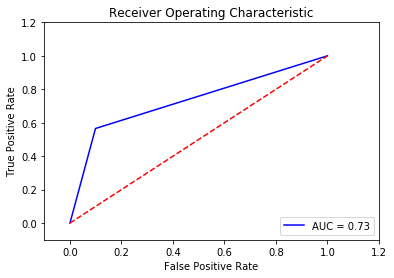

In [44]:
# Finding Accuracy of KNN Classifier
y_pred = clf_knn.predict(x_test)
model_perf('KNN classifier', x_train, y_train, y_test,y_pred)

# Hyper-parameters Tuning for the KNN model

In [45]:
# Grid Search for dealing with Overfitting Problem
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
        ('clf_dt', KNeighborsClassifier())
    ])
parameters = {
    'clf_dt__n_neighbors' :(5,9,15,25),
    'clf_dt__weights': ('uniform','distance'),
    'clf_dt__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [50]:
grid_search = GridSearchCV(pipeline,parameters,cv=2,verbose=1,scoring='precision')
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  3.5min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf_dt', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf_dt__n_neighbors': (5, 9, 15, 25), 'clf_dt__weights': ('uniform', 'distance'), 'clf_dt__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

In [51]:
print(grid_search.best_params_)

{'clf_dt__algorithm': 'auto', 'clf_dt__n_neighbors': 25, 'clf_dt__weights': 'uniform'}


In [52]:
# Training the Model by Applying KNN Classifier
clf_knn_best = KNeighborsClassifier(n_neighbors=25,algorithm='auto',weights='uniform')
clf_knn_best.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

Model name: knn classifier
Test accuracy (Accuracy Score): 0.833453
Test accuracy (ROC AUC Score): 0.736468
Area Under the Precision-Recall Curve: 0.431553


/Users/ssg/Desktop/Python/packge/joblib/externals/loky/backend/semaphore_tracker.py:71: UserWarning: semaphore_tracker: process died unexpectedly, relaunching.  Some semaphores might leak.
  warnings.warn('semaphore_tracker: process died unexpectedly, '


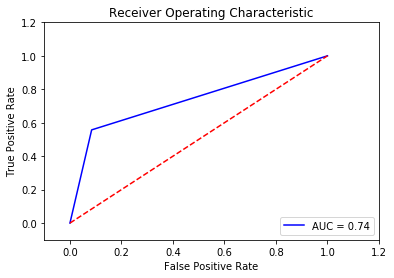

In [53]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_knn_best.predict(x_test)
model_perf('knn classifier', x_train, y_train, y_test,y_pred)

# Model Performance measures

In [54]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [55]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.66      0.56      0.61       962
           0       0.87      0.92      0.89      3229

   micro avg       0.83      0.83      0.83      4191
   macro avg       0.77      0.74      0.75      4191
weighted avg       0.83      0.83      0.83      4191

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1        536   426
        0        272  2957


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


# Generating Decile Report

In [56]:
# Decile Report
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [57]:
train_decile, test_decile = Decile_report(clf_knn_best, x_train, x_test, y_train, y_test)

In [58]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,420,0.80,7.79e-01,327.0,327.0,0.78,0.34,3.39
1,1,419,0.57,5.39e-01,226.0,553.0,0.66,0.57,2.87
2,2,419,0.41,3.70e-01,155.0,708.0,0.56,0.74,2.45
3,3,419,0.28,2.48e-01,104.0,812.0,0.48,0.84,2.11
4,4,419,0.18,1.65e-01,69.0,881.0,0.42,0.92,1.83
5,5,419,0.11,9.80e-02,41.0,922.0,0.37,0.96,1.60
6,6,419,0.06,5.70e-02,24.0,946.0,0.32,0.98,1.41
7,7,419,0.02,2.10e-02,9.0,955.0,0.28,0.99,1.24
8,8,419,0.00,7.00e-03,3.0,958.0,0.25,1.00,1.11
9,9,419,0.00,1.00e-02,4.0,962.0,0.23,1.00,1.00
